In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("2017PurchasePricesDec_clean.csv")
df.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750.0,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750.0,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750.0,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750.0,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750.0,1,10.94,7245,PROXIMO SPIRITS INC.


In [4]:
df["margin"] = df["Price"] - df["PurchasePrice"]

df[["Price","PurchasePrice","margin"]].describe()

,Price,PurchasePrice,margin
count,12261.000000,12261.000000,12261.000000
mean,38.640240,26.488220,12.152020
std,206.151172,156.182948,51.455074
min,0.000000,0.000000,-11.190000
25%,10.990000,6.890000,3.540000
50%,15.990000,10.650000,5.470000
75%,29.990000,20.130000,9.710000
max,13999.900000,11111.030000,2888.870000


Calculé el margen unitario por producto para identificar rentabilidad y posibles casos negativos.-

In [5]:
negativos = df[df["margin"] < 0]
negativos[["Description","Price","PurchasePrice","margin"]]

,Description,Price,PurchasePrice,margin
7915,Unknown,0.0,11.19,-11.19


Se detecta un producto con margen negativo, que deberá revisarse por error de precio o estrategia comercial.-

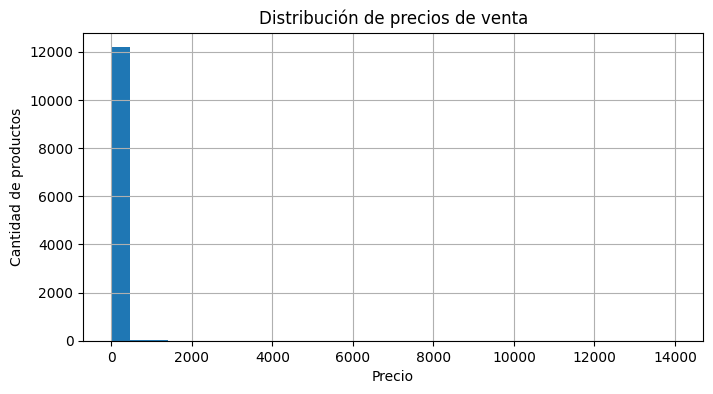

In [6]:
plt.figure(figsize=(8,4))
df["Price"].hist(bins=30)
plt.title("Distribución de precios de venta")
plt.xlabel("Precio")
plt.ylabel("Cantidad de productos")
plt.show()

La mayoría de los productos se concentran en rangos bajos con una cola hacia precios premium.-

In [7]:
top_vendors = df.groupby("VendorName")["Brand"].count()\
                .sort_values(ascending=False).head(10)

top_vendors

VendorName
MARTIGNETTI COMPANIES          1631
ULTRA BEVERAGE COMPANY LLP      965
M S WALKER INC                  960
PERFECTA WINES                  897
E & J GALLO WINERY              527
CONSTELLATION BRANDS INC        481
PINE STATE TRADING CO           480
DIAGEO NORTH AMERICA INC        449
JIM BEAM BRANDS COMPANY         415
SOUTHERN WINE & SPIRITS NE      408
Name: Brand, dtype: int64

El catálogo está concentrado en pocos proveedores, lo que puede implicar riesgo de dependencia.-

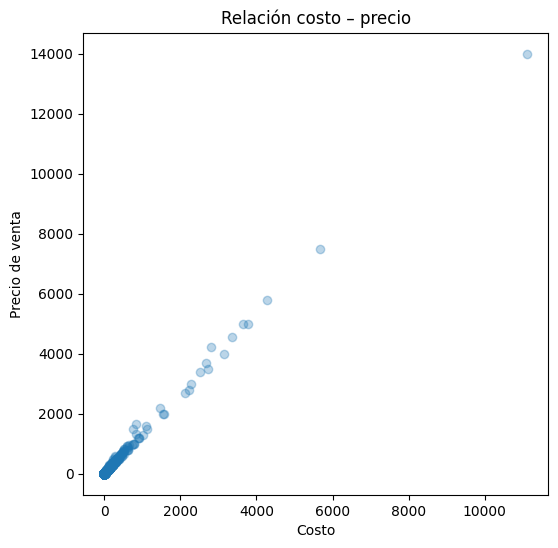

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(df["PurchasePrice"], df["Price"], alpha=0.3)
plt.xlabel("Costo")
plt.ylabel("Precio de venta")
plt.title("Relación costo – precio")
plt.show()

En mi EDA sobre la tabla de precios calculé el margen unitario por producto.

El margen promedio es de 12 dólares, con distribución razonable, pero detecté un registro con margen negativo asociado a un producto ‘Unknown’, que debería revisarse por posible error de carga.”

La distribución de precios muestra fuerte concentración en rangos bajos y una cola hacia productos premium, con un outlier cercano a 14 mil.

El catálogo está concentrado en pocos vendors: los primeros 4 concentran gran parte de las marcas, lo que implica posible dependencia de proveedores.

La relación costo–precio es mayormente lineal, lo que sugiere una política de markup consistente.

Conclusión I - Riesgo comercial por concentracion

El análisis del catálogo muestra una alta concentración de productos en pocos proveedores, donde los primeros vendors representan una porción significativa de las marcas.
Esto puede implicar:

Riesgo de dependencia comercial,
menor poder de negociación de precios,
impacto directo en márgenes ante cambios de condiciones del proveedor.

Se recomienda evaluar diversificación o acuerdos estratégicos con proveedores clave.

Conclusión II - Oportunidad de control de precios

La relación costo–precio es mayormente lineal y consistente, lo que indica una política de markup estable.
Sin embargo:

Se detectó un caso con margen negativo,
un outlier de precio elevado.

Lo que sugiere la necesidad de implementar reglas de validación de precios antes de la carga, para evitar pérdidas por errores operativos.

Como conclusiones principales, vemos por un lado una concentración fuerte del catálogo en pocos proveedores, lo que es un riesgo a nivel negociación y abastecimiento.
Y por otro, una política de precios coherente, pero con casos puntuales a controlar, por lo que proponemos incorporar validaciones automáticas de márgenes en el pipeline.-